In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
netflix = pd.read_csv(r"NFLX.csv")

In [5]:
if 'Adj Close' in netflix.columns:
    netflix.drop('Adj Close', axis=1, inplace=True)

In [6]:
# Convert Date to datetime and extract parts
netflix['Date'] = pd.to_datetime(netflix['Date'])
netflix['Year'] = netflix['Date'].dt.year
netflix['Month'] = netflix['Date'].dt.month
netflix['Day'] = netflix['Date'].dt.day


C:\Users\tadas\AppData\Local\Temp\ipykernel_2532\2019306511.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  netflix['Date'] = pd.to_datetime(netflix['Date'])


In [7]:
# Feature engineering
netflix['HL_diff'] = netflix['High'] - netflix['Low']
netflix['Price_range'] = netflix['High'] - netflix['Open']

In [8]:
print("\n Dataset Preview:")
print(netflix.head())


 Dataset Preview:
        Date      Open      High       Low     Close     Volume  Year  Month  \
0 2002-05-23  1.156429  1.242857  1.145714  1.196429  104790000  2002      5   
1 2002-05-24  1.214286  1.225000  1.197143  1.210000   11104800  2002      5   
2 2002-05-28  1.213571  1.232143  1.157143  1.157143    6609400  2002      5   
3 2002-05-29  1.164286  1.164286  1.085714  1.103571    6757800  2002      5   
4 2002-05-30  1.107857  1.107857  1.071429  1.071429   10154200  2002      5   

   Day   HL_diff  Price_range  
0   23  0.097143     0.086428  
1   24  0.027857     0.010714  
2   28  0.075000     0.018572  
3   29  0.078572     0.000000  
4   30  0.036428     0.000000  


In [9]:
print("\n Shape of Dataset:", netflix.shape)


 Shape of Dataset: (5044, 11)


In [10]:
print("\n Summary Statistics")
print(netflix.describe())


 Summary Statistics
                                Date         Open         High          Low  \
count                           5044  5044.000000  5044.000000  5044.000000   
mean   2012-05-28 17:26:18.747026176   116.467981   118.237392   114.578719   
min              2002-05-23 00:00:00     0.377857     0.410714     0.346429   
25%              2007-05-28 00:00:00     3.955357     4.031072     3.885357   
50%              2012-05-27 00:00:00    25.819285    26.342143    25.455000   
75%              2017-06-01 06:00:00   155.762497   157.654998   153.944996   
max              2022-06-03 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   168.740876   171.140864   166.119837   

             Close        Volume         Year        Month          Day  \
count  5044.000000  5.044000e+03  5044.000000  5044.000000  5044.000000   
mean    116.456338  1.653068e+07  2011.905630     6.545797    15.737708   
min       0.372857  2.856000e+05  2002.000

In [11]:
print("\n Missing Values:")
print(netflix.isnull().sum())


 Missing Values:
Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Year           0
Month          0
Day            0
HL_diff        0
Price_range    0
dtype: int64


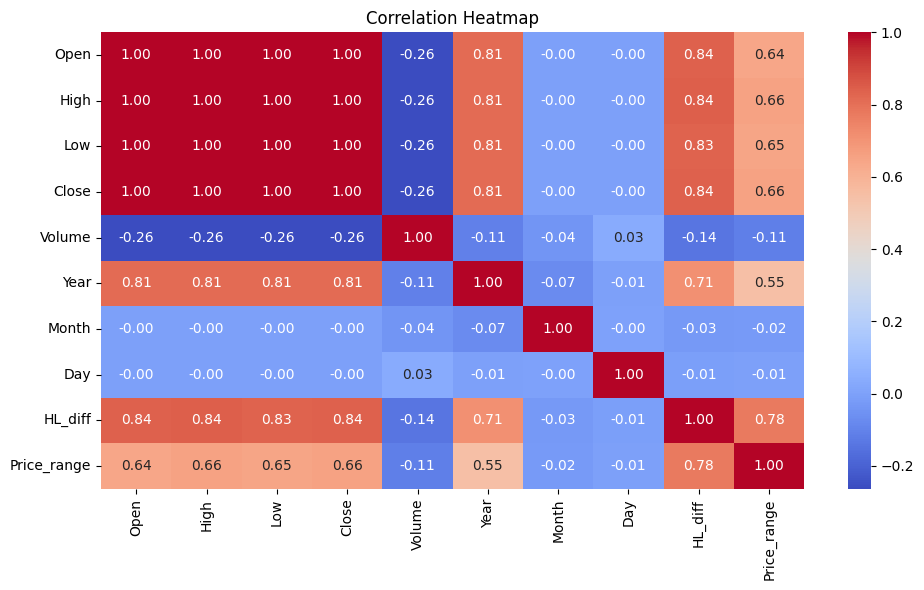

In [12]:
# ---- 2. Correlation Matrix ----
plt.figure(figsize=(10, 6))
sns.heatmap(netflix.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

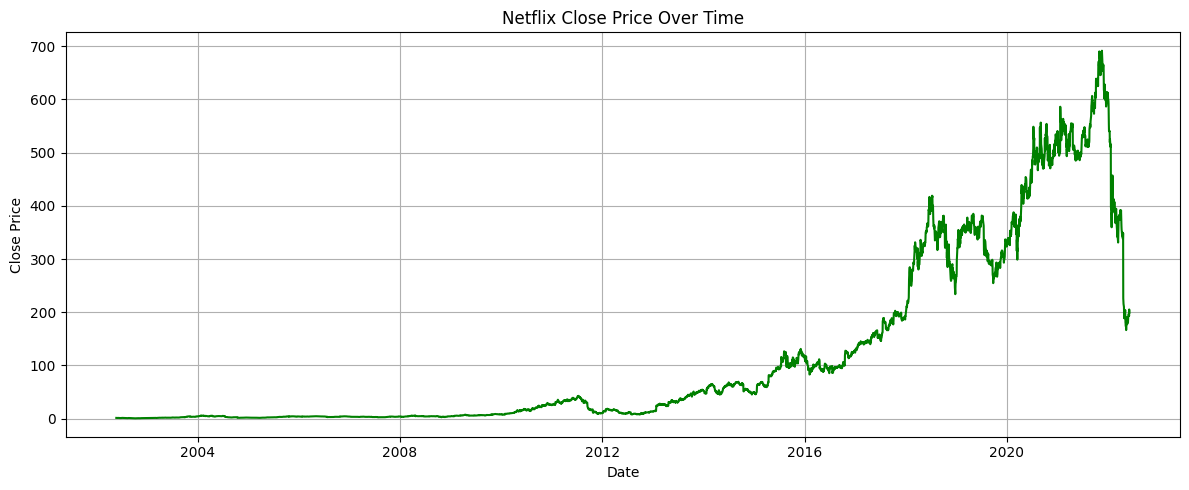

In [13]:
# ---- 3. Close Price Trend Over Time ----
plt.figure(figsize=(12, 5))
plt.plot(netflix['Date'], netflix['Close'], color='green')
plt.title("Netflix Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

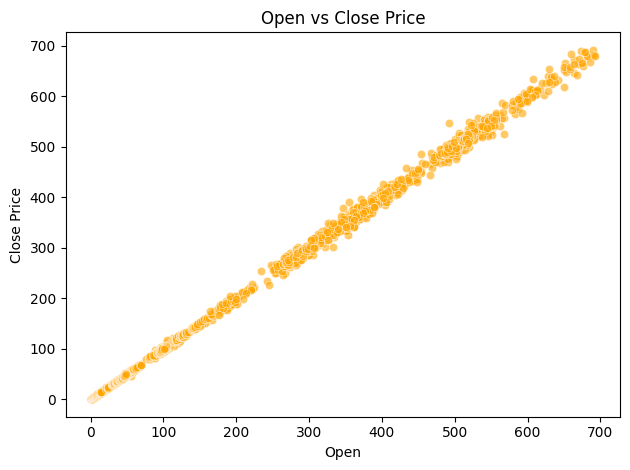

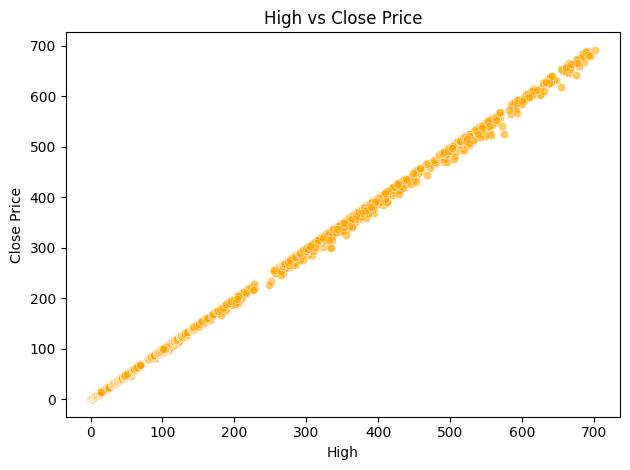

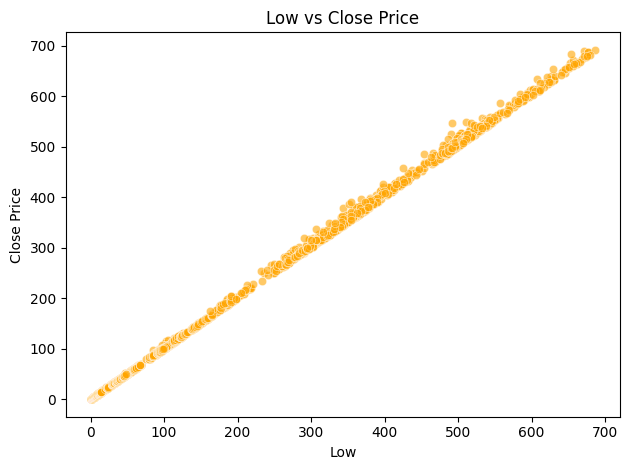

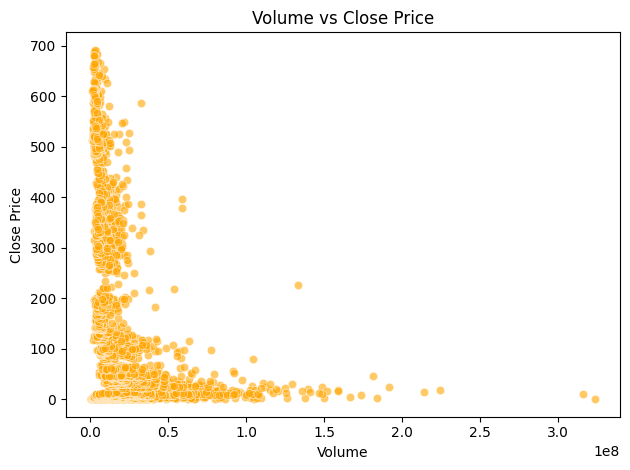

In [14]:
# ---- 4. Relationship with Close Price ----
for col in ['Open', 'High', 'Low', 'Volume']:
    plt.figure()
    sns.scatterplot(x=netflix[col], y=netflix['Close'], alpha=0.6, color='orange')
    plt.title(f"{col} vs Close Price")
    plt.xlabel(col)
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()